# **Zaman Serilerinin Ortak Özellikleri:**


1.   Trend
2.   Seasonality (Mevsimsellik)
3.   Autocorrelation
4.   Noise

# **Zaman Serilerini Tahmin Etme Teknikleri:**

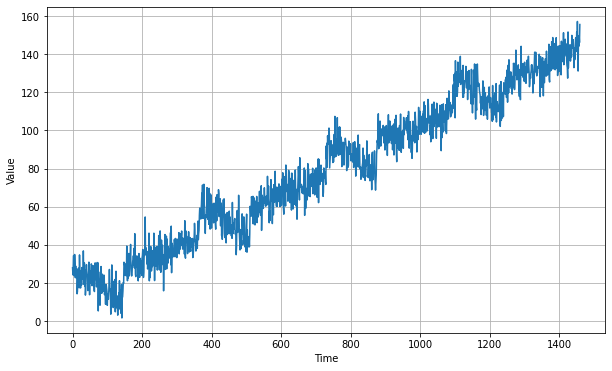

In [ ]:
# içerisinde mevsimsellik olan bir veri seti oluşturalım. bu veri setini herhangi bir kaynaktan çekebiliriz.
# şimdilik biz oluşturuyoruz.

import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
 plt.plot(time[start:end], series[start:end], format)
 plt.xlabel("Time")
 plt.ylabel("Value")
 plt.grid(True)
def trend(time, slope=0):
 return slope * time
def seasonal_pattern(season_time):
 return np.where(season_time < 0.4,
 np.cos(season_time * 2 * np.pi),
 1 / np.exp(3 * season_time))
def seasonality(time, period, amplitude=1, phase=0):
 season_time = ((time + phase) % period) / period
 return amplitude * seasonal_pattern(season_time)
def noise(time, noise_level=1, seed=None):
 rnd = np.random.RandomState(seed)
 return rnd.randn(len(time)) * noise_level
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, .05) 
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


In [ ]:
# elimizde veri seti varsa eğitim ve test olarak bölebiliriz.
split_time = int(input("lütfen kaçıncı adımdan önceyi eğitim olarak kullanmak istediğinizi belirtiniz:"))
naive_forecast = series[split_time - 1:-1]


lütfen kaçıncı adımdan önceyi eğitim olarak kullanmak istediğinizi belirtiniz:1000


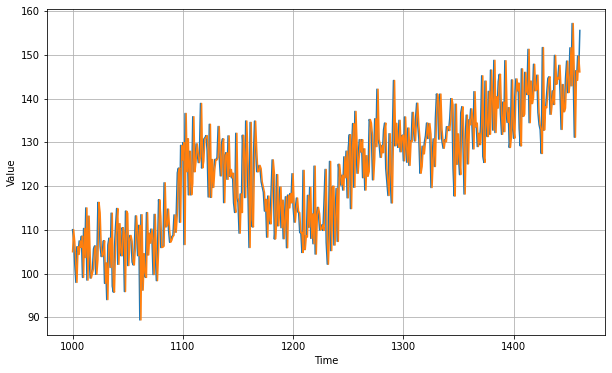

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time[split_time:], series[split_time:])
plot_series(time[split_time:], naive_forecast)
plt.show()


In [ ]:
# hata hesaplamak için
errors = naive_forecast - series[split_time:]
abs_errors = np.abs(errors)
mae = abs_errors.mean()
print(mae)


6.8992977


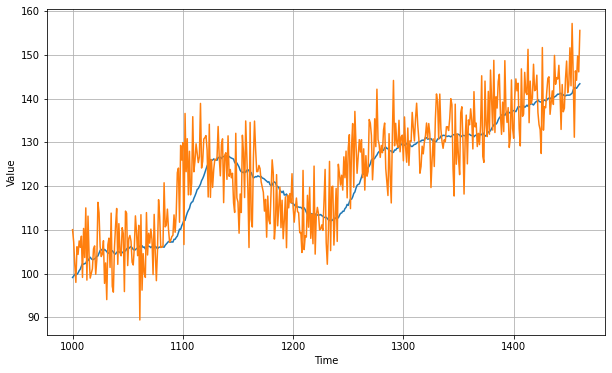

In [ ]:
# Moving Average : hareketli ortalama kullanmak, daha naif bir uygualama için..
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time[split_time:], moving_avg)
plot_series(time[split_time:], series[split_time:])
plt.show()

In [ ]:
import tensorflow as tf
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))

for window in dataset:
 print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
 print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
 print("x = ", x.numpy())
 print("y = ", y.numpy())


x =  [[3 4 5 6]
 [0 1 2 3]]
y =  [[7]
 [4]]
x =  [[1 2 3 4]
 [2 3 4 5]]
y =  [[5]
 [6]]
x =  [[5 6 7 8]
 [4 5 6 7]]
y =  [[9]
 [8]]


In [ ]:
def trend(time, slope=0):
 return slope * time
def seasonal_pattern(season_time):
 return np.where(season_time < 0.4,np.cos(season_time * 2 * np.pi),1 / np.exp(3 * season_time))
def seasonality(time, period, amplitude=1, phase=0):
 season_time = ((time + phase) % period) / period
 return amplitude * seasonal_pattern(season_time)
def noise(time, noise_level=1, seed=None):
 rnd = np.random.RandomState(seed)
 return rnd.randn(len(time)) * noise_level
time = np.arange(4 * 365 + 1, dtype="float32")
series = trend(time, 0.1)
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5
series = baseline + trend(time, slope)
series += seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

In [ ]:
def windowed_dataset(series, window_size,
 batch_size, shuffle_buffer):
 dataset = tf.data.Dataset.from_tensor_slices(series)
 dataset = dataset.window(window_size + 1, shift=1,
 drop_remainder=True)
 dataset = dataset.flat_map(lambda window:
 window.batch(window_size + 1))
 dataset = dataset.shuffle(shuffle_buffer).map(
 lambda window:
 (window[:-1], window[-1]))
 dataset = dataset.batch(batch_size).prefetch(1)
 return dataset

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size,shuffle_buffer_size)


In [ ]:
dataset = windowed_dataset(series, window_size, 1, shuffle_buffer_size)
for feature, label in dataset.take(1):
 print(feature)
 print(label)

tf.Tensor(
[[31.364225 24.001968 29.15618  25.720789 20.458794 25.260942 30.911596
  22.807709 30.573557  9.413281 26.38145  22.465471 20.291958 22.001118
  11.358449 19.95067  22.586191 27.940659 17.709457 16.007118]], shape=(1, 20), dtype=float32)
tf.Tensor([17.28884], shape=(1,), dtype=float32)


In [ ]:
dataset = windowed_dataset(series, window_size,batch_size, shuffle_buffer_size)


In [ ]:
# pencere boyutu, veri bölme işleminden sonra verimizi hazırladığımıza göre modelimizi kurabiliriz.

model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(10, input_shape=[window_size],
 activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(lr=1e-6,momentum=0.9))

In [ ]:
model.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
46/46 [==============================] - 1s 8ms/step - loss: 956.6693
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 53.6517
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 44.8458
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 58.5961
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 43.6970
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 44.3937
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 43.1047
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 42.6185
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 41.9803
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 43.6479
Epoch 11/100
46/46 [==============================] - 0s 3ms/step - loss: 43.0629
Epoch 12/100
46/46 [==============================] - 0s 3ms/step - loss: 44.8269
Epoch 13/100
46/46 [====

In [ ]:
print(series[1000:1020])

[109.170746 106.86935  102.61668   99.15634  105.95478  104.503876
 107.08533  105.858284 108.00339  100.15279  109.4894   103.96404
 113.426094  99.67773  111.87749  104.26137  100.08899  101.00105
 101.893265 105.69048 ]


In [ ]:
print(series[1000:1020])

[109.170746 106.86935  102.61668   99.15634  105.95478  104.503876
 107.08533  105.858284 108.00339  100.15279  109.4894   103.96404
 113.426094  99.67773  111.87749  104.26137  100.08899  101.00105
 101.893265 105.69048 ]


In [ ]:
print(model.predict(series[1000:1020][np.newaxis]))


1/1 [==============================] - 0s 156ms/step
[[104.283066]]


In [ ]:
forecast = []
for time in range(len(series) - window_size):
 forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]



1/1 [==============================] - 0s 16ms/step


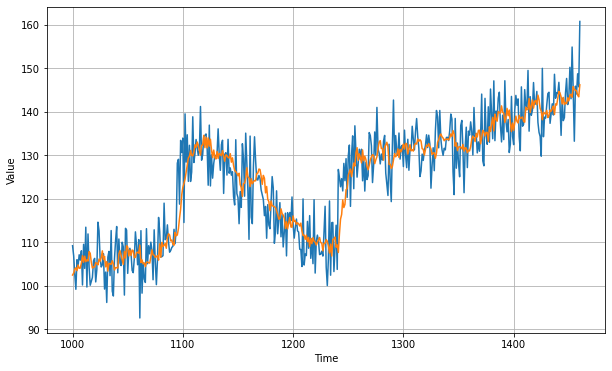

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
# lr tuning yapalım.
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)

history = model.fit(dataset, epochs=100,callbacks=[lr_schedule], verbose=0)

(1e-08, 0.001, 0.0, 300.0)

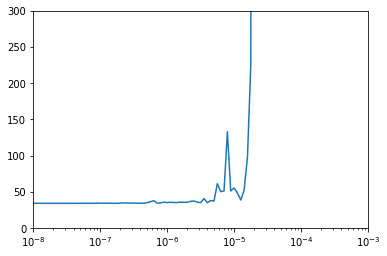

In [ ]:
#Öğrenme oranına karşı kayıp çizimi
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])


In [ ]:
# düzeltilmiş öğrenme oranına sahip zaman serisi tahmin grafiğimiz.
# lr 1e-5 yapıldı.

model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(lr=1e-5,momentum=0.9))
model.fit(dataset,epochs=100,verbose=1)
forecast = []
for time in range(len(series) - window_size):
 forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

# **Keras Tuner İle Hiperparametre Ayarı:**

In [ ]:
# lr parametre ayarının yanısıra bir çok hiperparametre var. bunların hepsini
# manuel olarak yapmak zor olabilir.
# bunun için kullanacağımız çok güzel bir tool var :  Keras Tuner

# Hiperparametre ayarı için Keras Tuner kullanacağız. Keras Tuner, olası her bir parametre seti ile birden fazla modeli eğitecektir.

In [ ]:
!pip install keras-tuner

In [ ]:
# modelimiz farklı değerler ile 11 kez eğitilecek: 30-10/2 + 1 = 11 :)
import keras_tuner
from keras_tuner import RandomSearch

def build_model(hp):
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Dense(
 units=hp.Int('units', min_value=10, max_value=30, step=2),
 activation='relu', input_shape=[window_size]))
 model.add(tf.keras.layers.Dense(10, activation='relu'))
 model.add(tf.keras.layers.Dense(1))
 model.compile(loss="mse",
 optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum',
 values=[.9, .7, .5, .3]),
 lr=1e-5))
 return model

tuner = RandomSearch(build_model,objective='loss', max_trials=150,executions_per_trial=3, directory='my_dir',project_name='hello')
tuner.search(dataset, epochs=100, verbose=0)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# hiperparam ayarlarına göre modelimizin loss değerlerine bakalım ve en iyi hiperparama sahip modelimizi seçelim.
tuner.results_summary()
# en iyi 4 modelimizi şu şekilde getirebiliriz.
tuner.get_best_models(num_models=4)

Results summary
Results in my_dir/hello
Showing 10 best trials
Trial summary
Hyperparameters:
units: 24
momentum: 0.9
Score: 34.47472127278646
Trial summary
Hyperparameters:
units: 26
momentum: 0.5
Score: 34.51167678833008
Trial summary
Hyperparameters:
units: 26
momentum: 0.3
Score: 34.750726064046226
Trial summary
Hyperparameters:
units: 30
momentum: 0.7
Score: 34.770912170410156
Trial summary
Hyperparameters:
units: 26
momentum: 0.7
Score: 34.795721689860024
Trial summary
Hyperparameters:
units: 20
momentum: 0.7
Score: 34.80031712849935
Trial summary
Hyperparameters:
units: 14
momentum: 0.9
Score: 34.82088979085287
Trial summary
Hyperparameters:
units: 28
momentum: 0.7
Score: 34.85409800211588
Trial summary
Hyperparameters:
units: 30
momentum: 0.3
Score: 34.87547938028971
Trial summary
Hyperparameters:
units: 30
momentum: 0.5
Score: 34.986368815104164


Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 710.1738
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 64.4275
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 45.2103
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 41.0015
Epoch 5/100
31/31 [==============================] - 1s 7ms/step - loss: 48.2444
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 40.6113
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 39.4971
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 37.7759
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 37.7612
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 37.5315
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 37.4341
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 36.8965
Epoch 13/100
31/31 [====

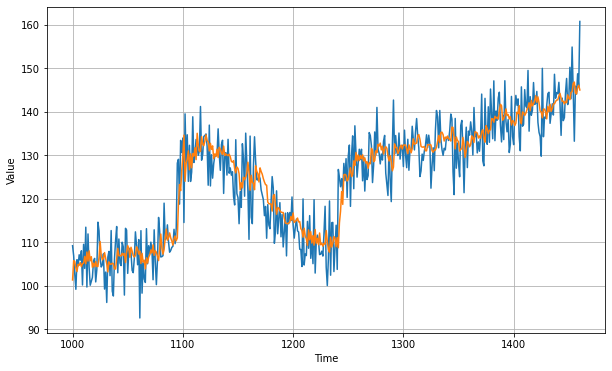

In [ ]:
# en iyi model parametrelerine bakarak units ve learning rate değerlerini de alarak
# tekrardan modelimizi eğitelim ve sonuçlara bakalım. unıts:24, momentum 0.9

dataset = windowed_dataset(x_train, window_size, batch_size,shuffle_buffer_size)
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(24, input_shape=[window_size],
 activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=100, verbose=1)

# Optimize edilmiş hiperparametrelere sahip tahmin tablosu

forecast = []
for time in range(len(series) - window_size):
 forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)


# **Zaman Serileri İçin Convolutional Ve Recurrent Metod**

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
 series = tf.expand_dims(series, axis=-1)
 dataset = tf.data.Dataset.from_tensor_slices(series)
 dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
 dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
 dataset = dataset.shuffle(shuffle_buffer).map(
 lambda window: (window[:-1], window[-1]))
 dataset = dataset.batch(batch_size).prefetch(1)
 return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv1D(filters=128, kernel_size=3,
 strides=1, padding="causal",
 activation="relu",
input_shape=[None, 1]),
 tf.keras.layers.Dense(28, activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=10, verbose=1)


Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


31/31 [==============================] - 1s 3ms/step - loss: 1616.1516
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 1293.9395
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 1273.0961
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 1287.9067
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 1289.3771
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 1260.1766
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 1249.2194
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 1236.2544
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 1230.1766
Epoch 10/10
31/31 [==============================] - 0s 3ms/step - loss: 1195.9403


In [ ]:
def model_forecast(model, series, window_size):
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size))
 ds = ds.batch(32).prefetch(1)
 forecast = model.predict(ds)
 return forecast

In [ ]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)


46/46 [==============================] - 0s 3ms/step


In [ ]:
results = forecast[split_time - window_size:-1, -1, 0]


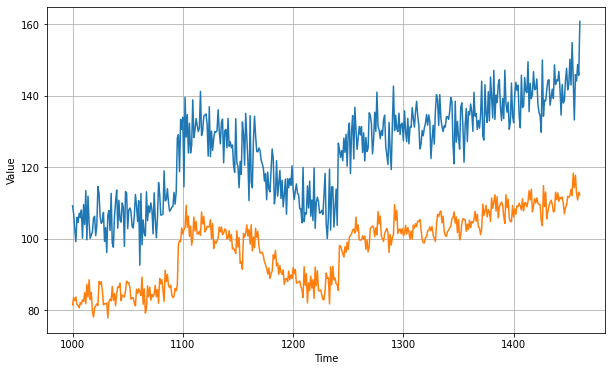

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
def build_model(hp):
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Conv1D(
 filters=hp.Int('units',min_value=128, max_value=256, step=64),
 kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
 strides=hp.Int('strides', min_value=1, max_value=3, step=1),
 padding='causal', activation='relu', input_shape=[None, 1]
 ))
 model.add(tf.keras.layers.Dense(28, input_shape=[window_size],
 activation='relu'))
 
 model.add(tf.keras.layers.Dense(10, activation='relu'))
 
 model.add(tf.keras.layers.Dense(1))
 model.compile(loss="mse",
 optimizer=tf.keras.optimizers.SGD(momentum=0.5, lr=1e-5))
 return model

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from keras_tuner import RandomSearch
tuner = RandomSearch(build_model, objective='loss',max_trials=500, executions_per_trial=3,directory='my_dir', project_name='cnn-tune')
tuner.search_space_summary()
tuner.search(dataset, epochs=10, verbose=2)

Trial 18 Complete [00h 00m 06s]
loss: 1243.8578287760417

Best loss So Far: 1241.7512613932292
Total elapsed time: 00h 02m 14s


In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size,
 shuffle_buffer_size)
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv1D(filters=128, kernel_size=9,
 strides=1, padding="causal",
 activation="relu",
input_shape=[None, 1]),
 tf.keras.layers.Dense(28, input_shape=[window_size],
 activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=10, verbose=1)


Epoch 1/10
31/31 [==============================] - 1s 5ms/step - loss: 1767.4996
Epoch 2/10
31/31 [==============================] - 0s 5ms/step - loss: 1325.3527
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - loss: 1294.7556
Epoch 4/10
31/31 [==============================] - 0s 6ms/step - loss: 1283.2120
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 1271.8071
Epoch 6/10
31/31 [==============================] - 0s 5ms/step - loss: 1268.7324
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 1260.2014
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 1262.5403
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 1264.8887
Epoch 10/10
31/31 [==============================] - 0s 3ms/step - loss: 1269.5002


In [ ]:
def model_forecast(model, series, window_size):
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size))
 ds = ds.batch(32).prefetch(1)
 forecast = model.predict(ds)
 return forecast

In [ ]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)

46/46 [==============================] - 0s 3ms/step


In [ ]:
results = forecast[split_time - window_size:-1, -1, 0]

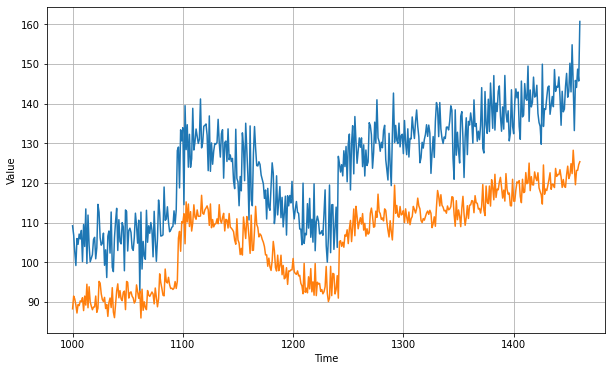

In [ ]:
# Optimize edilmiş CNN tahminleri
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)